##  Task 1: Import the importent library

In [10]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For reading stock data from yahoo
import yfinance as yf
from pandas_datareader.data import DataReader
                         #It looks like you are downloading stock data for Apple (AAPL), Google (GOOG), Microsoft (MSFT), 
                        #and Amazon (AMZN) using the yfinance library and creating a DataFrame for each company.

from datetime import datetime
from pandas_datareader import data as pdr

# Task 2: the change in price of the stock overtime

In [11]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

yf.pdr_override() #yf.pdr_override() is used to override the default behavior of pandas_datareader

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300,AMAZON
2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500,AMAZON
2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100,AMAZON
2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500,AMAZON
2024-02-09,170.899994,175.000000,170.580002,174.449997,174.449997,56986000,AMAZON
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,AMAZON
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,AMAZON
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMAZON
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMAZON


# Task 3: Statical numerical values.

In [12]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,178.287761,179.777960,176.983240,178.492360,177.941889,5.695244e+07
std,12.843690,12.698113,12.786402,12.725368,12.866094,1.591466e+07
min,144.380005,146.710007,143.899994,145.309998,144.538513,2.404830e+07
25%,171.342503,173.157501,170.552502,171.869999,171.221340,4.693145e+07
50%,179.590004,180.794998,177.590004,179.410004,178.884682,5.322830e+07
75%,189.312500,189.990005,187.737499,189.352497,188.939693,6.221395e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.282567e+08


# Task 4: General info


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-21 to 2024-02-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


# Task 5: Plot between Adj Close with respect to Closing price

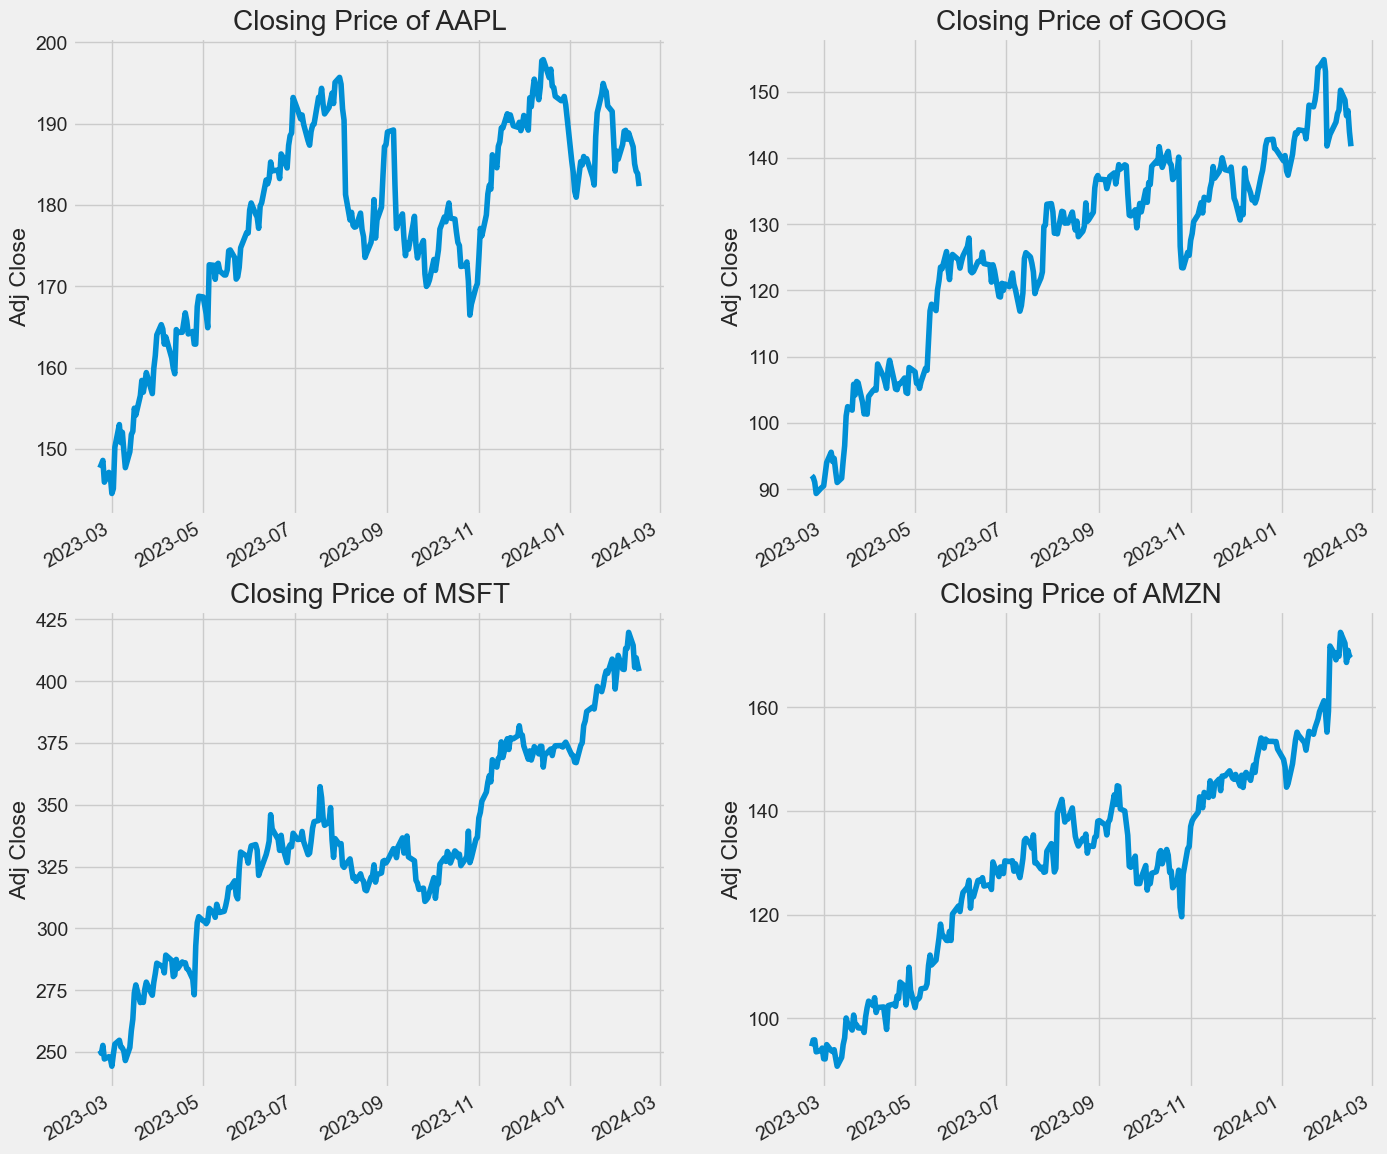

In [14]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    # The i variable is the loop counter, and tech_list[i - 1] accesses the corresponding stock symbol.
    
plt.show()

# Task 6: Plot the total volume of stock being traded each day

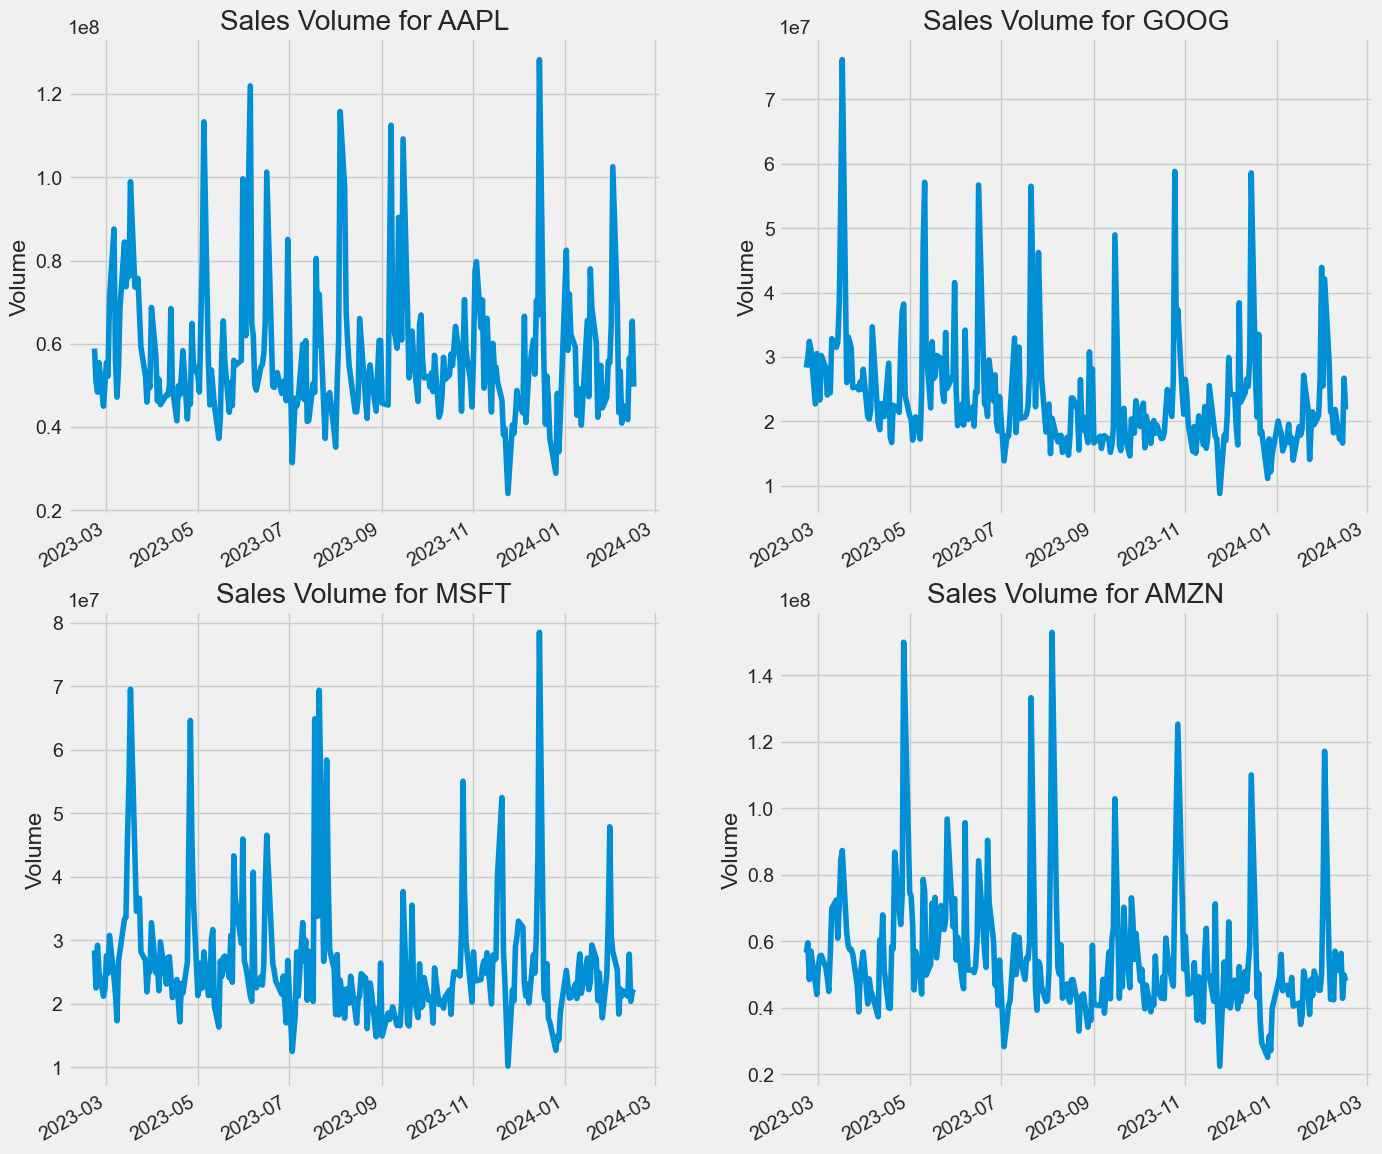

In [15]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.show()

# Task 7: Calculate Daily Returns:

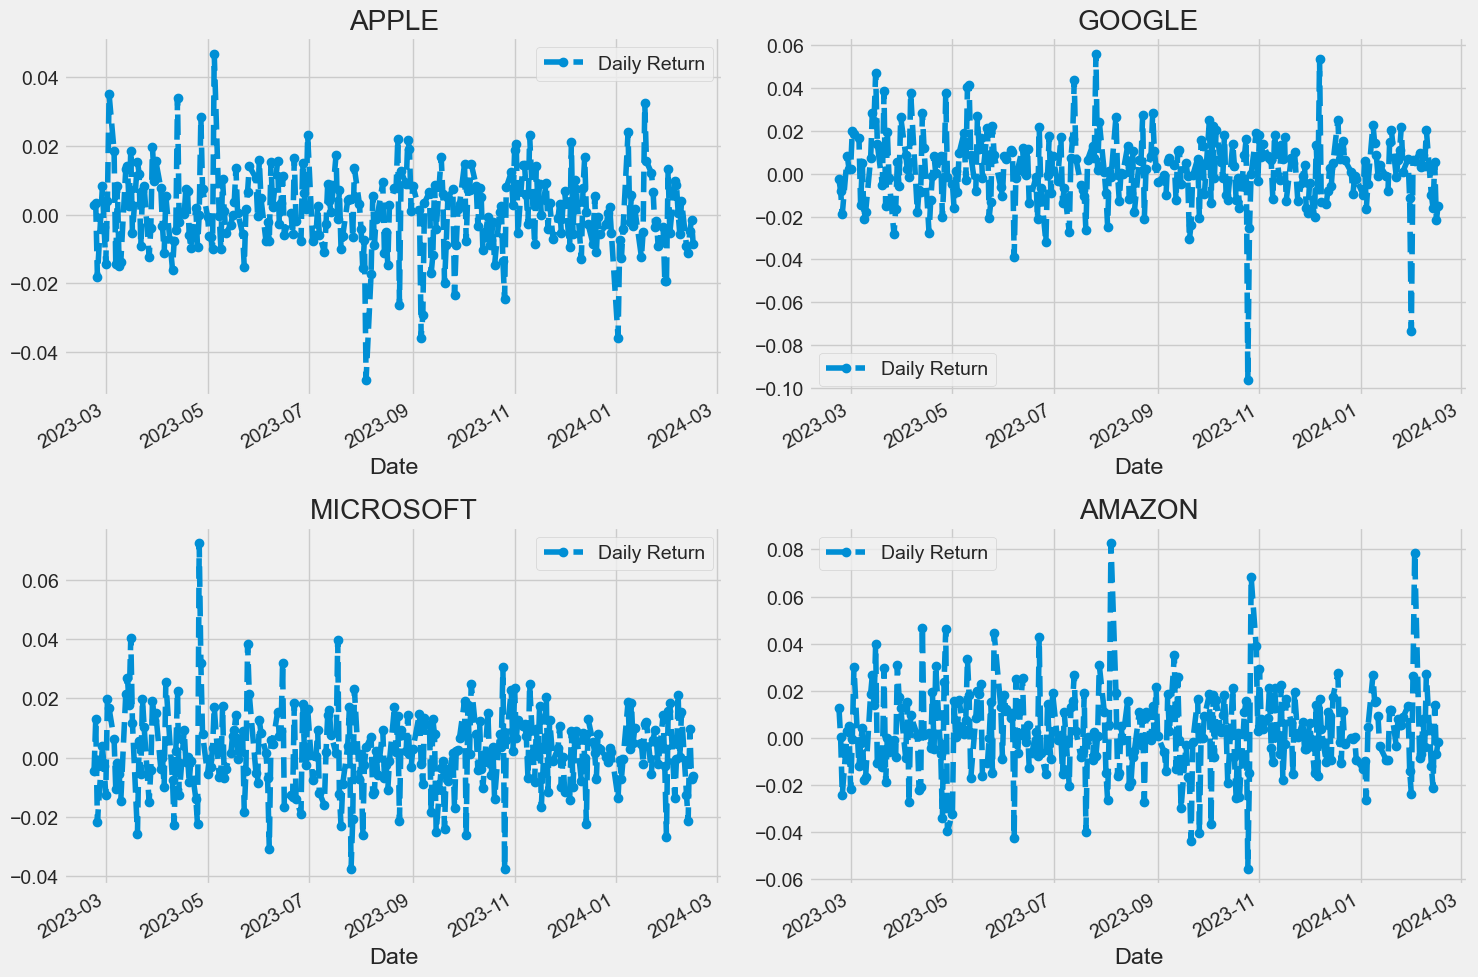

In [16]:

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Creating  Subplots:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


# Task 8:  The provided code calculates and plots the moving averages (MA) for different periods (10 days, 20 days, and 50 days) for the adjusted closing prices of four different companies (Apple, Google, Microsoft, and Amazon))


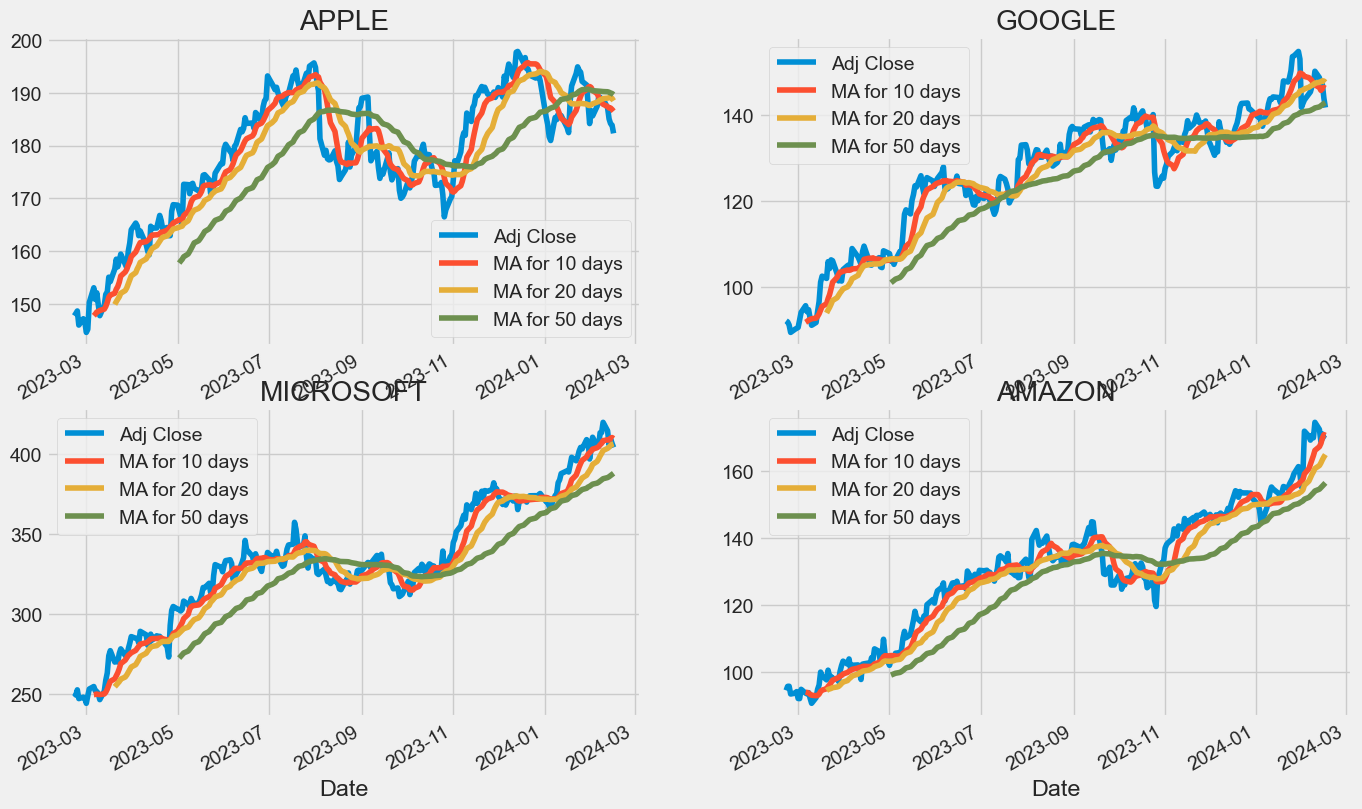

In [17]:

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


# The rolling() method in pandas is used for rolling window calculations on time series or sequential data. 
# calculate like mean(), sum(), min(), max(), etc. to compute rolling statistics.


# Plotting:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

plt.show()

# Task 9: Daily Return with Histrogram chart

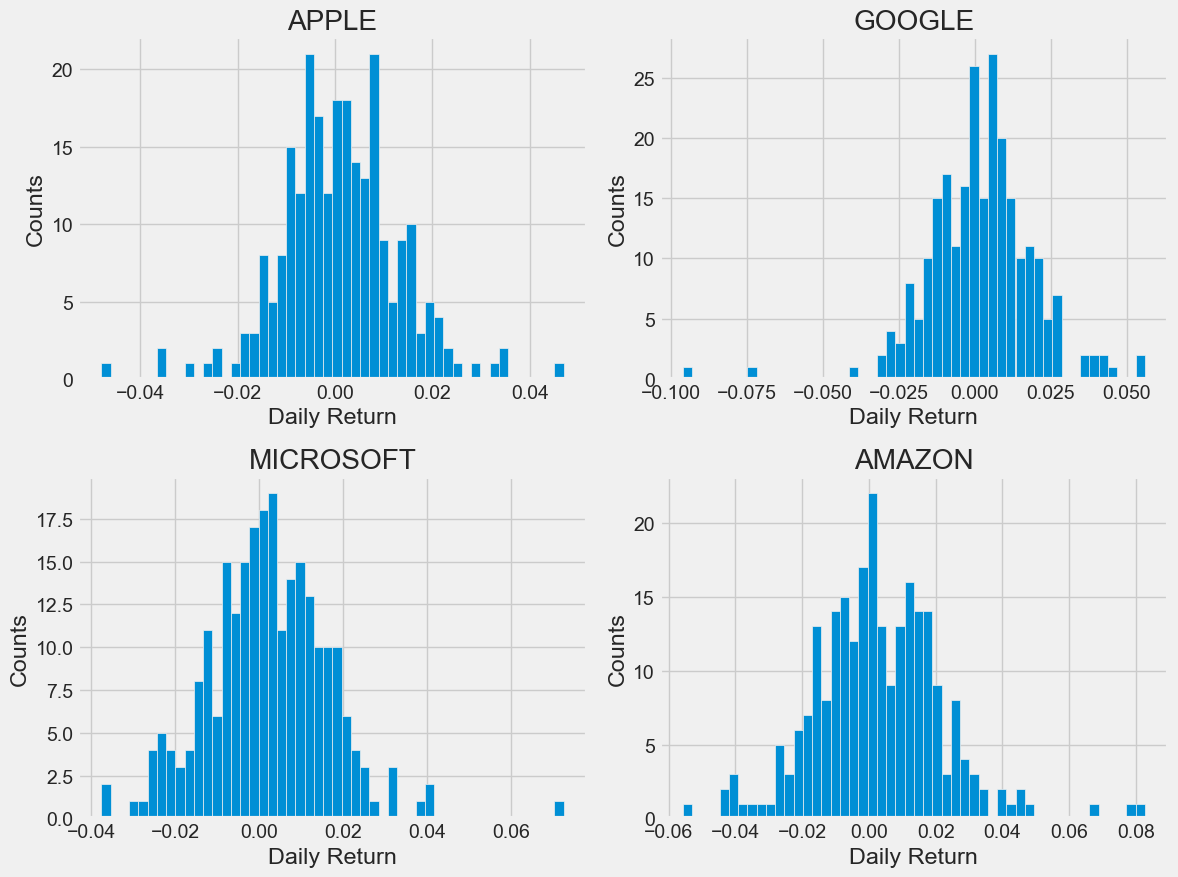

In [18]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# Task 10: Collecting all the closing prices for the tech stock list into one DataFrame

In [19]:

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Admin\AppData\Local\Programs\Python\Pytho

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-21,NaN,NaN,NaN,NaN
2023-02-22,0.002896,0.012793,-0.002716,-0.004591
2023-02-23,0.003291,0.000313,-0.007952,0.012962
2023-02-24,-0.018005,-0.024212,-0.018887,-0.021784
2023-02-27,0.008248,0.002781,0.008394,0.003772


# Task 11: Scatter Chat for Comparing Google to itself should show a perfectly linear relationship

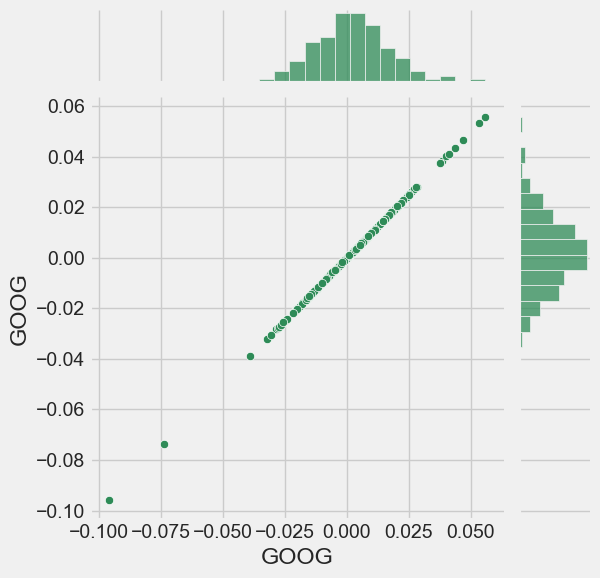

In [20]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

#  Task 12: We'll use joinplot to compare the daily returns of Google and Microsoft


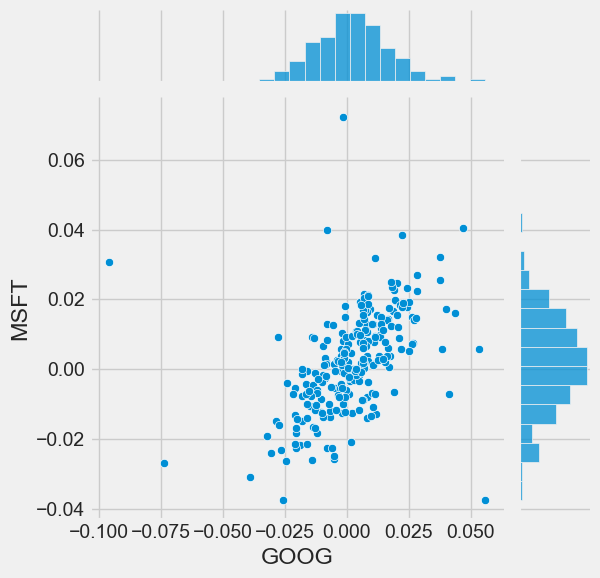

In [21]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

# Task 13: Pairplot to compare the daily returns of Google and Microsoft

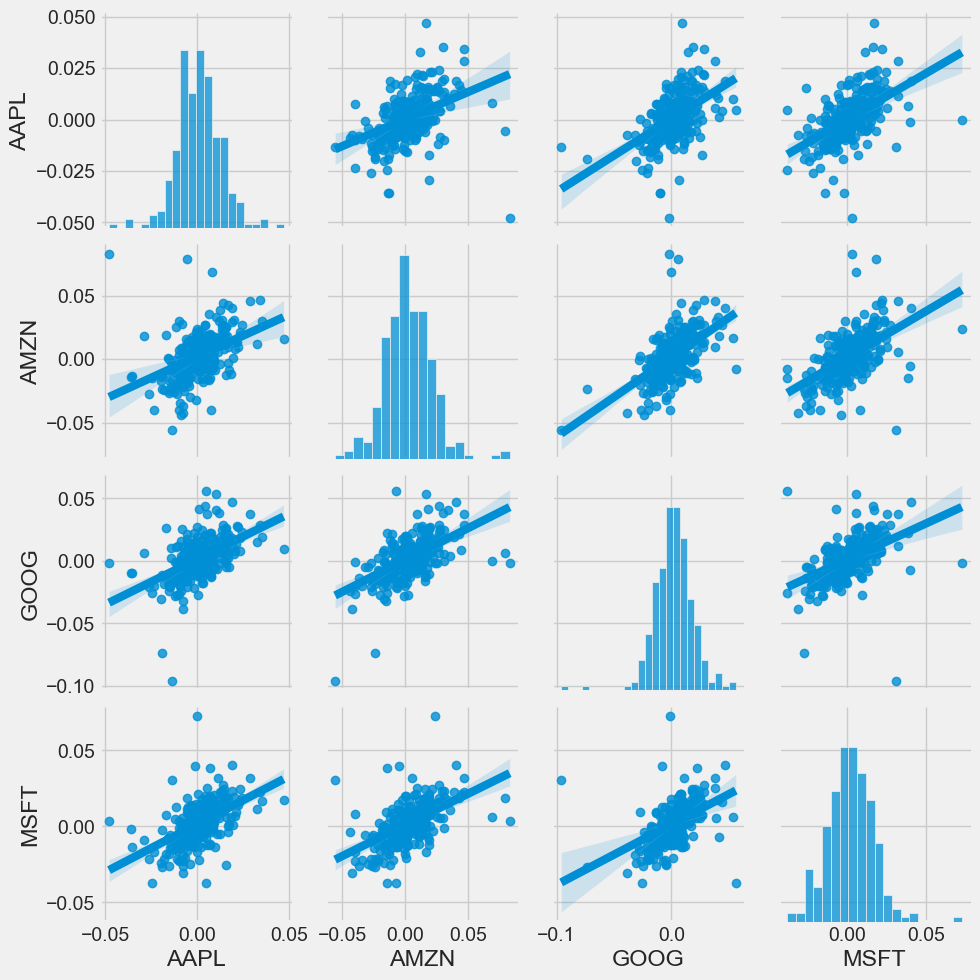

In [22]:
sns.pairplot(tech_rets, kind='reg')

# Task 14: Scatter plots, kde(kernel ) plots and histograms for better undersading on tech_rets(new tech returns DataFrame)

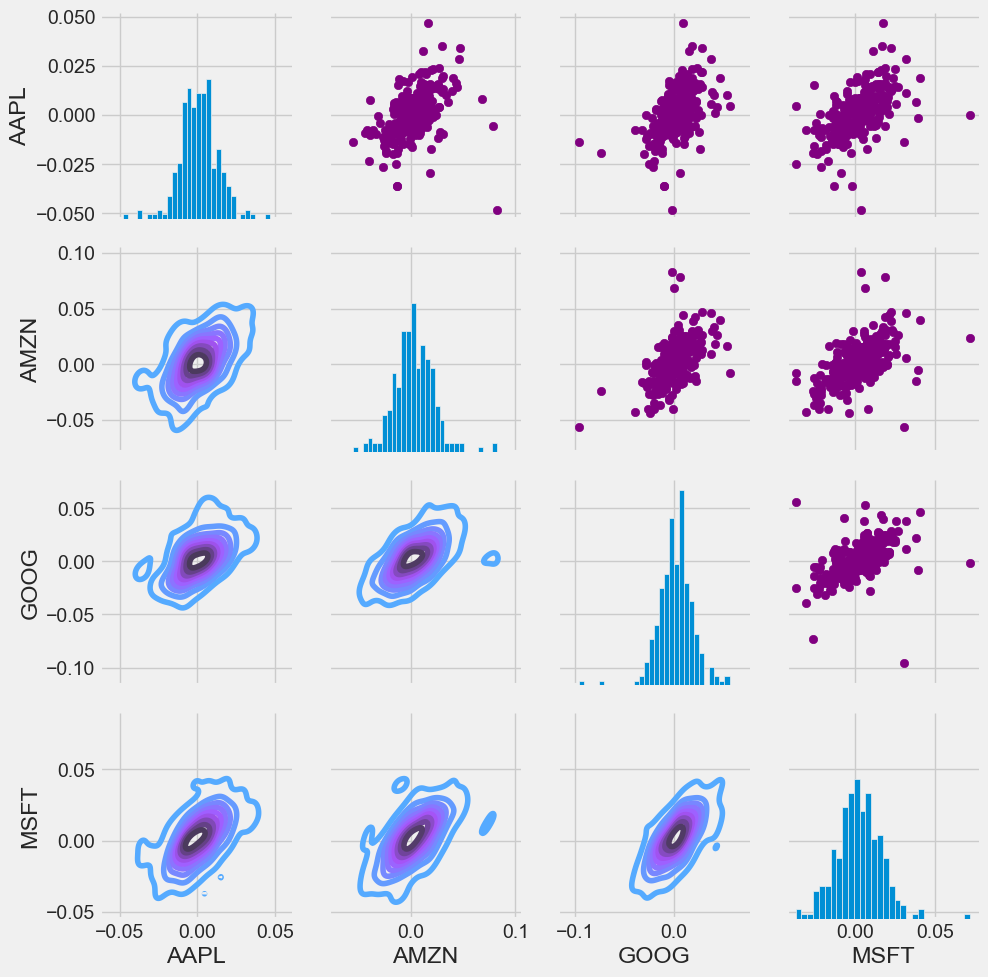

In [23]:

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# The kdeplot in seaborn stands for Kernel Density Estimate plot.
# It is a non-parametric way to estimate the probability density function of a continuous random variable
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)



# Task 15: visualization of relationships between variables in the closing_df(Collecting all the closing prices) Scatter plots, kde(kernel ) plots and histograms


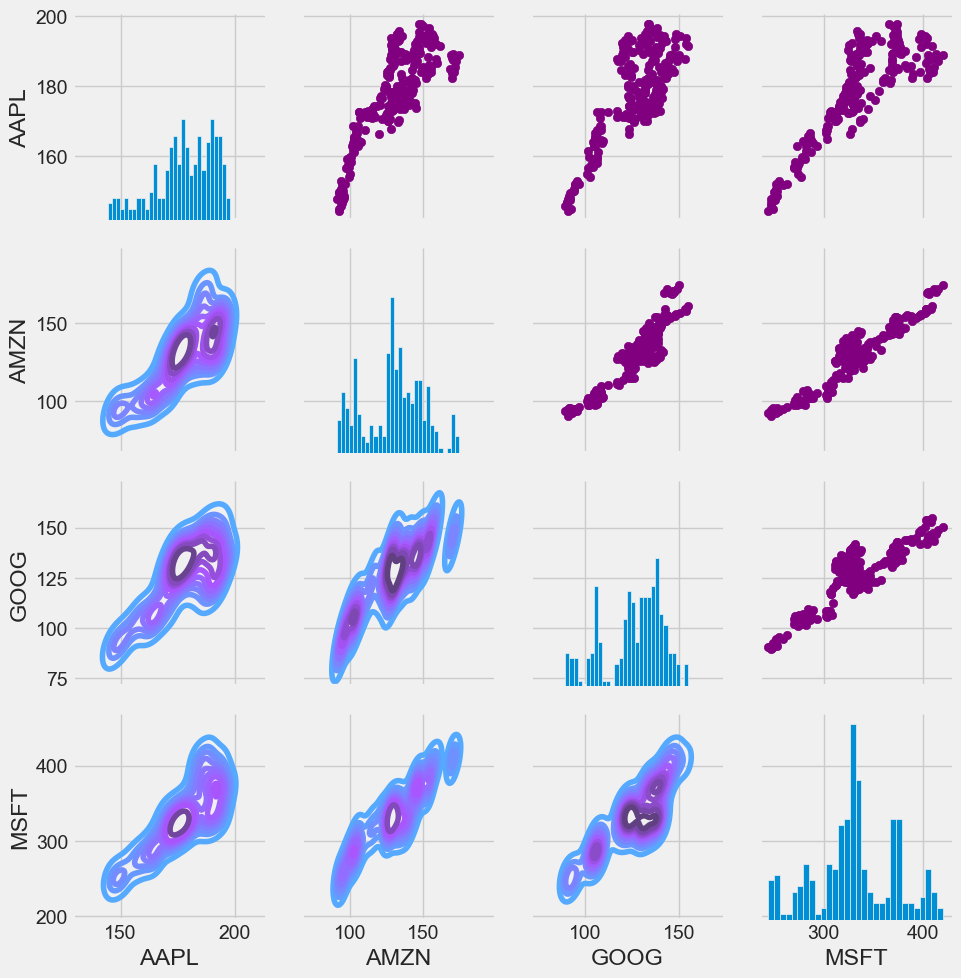

In [24]:

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)



# Task 16: Correlation between variables stock returns and stock Closing Prices


Text(0.5, 1.0, 'Correlation of stock closing price')

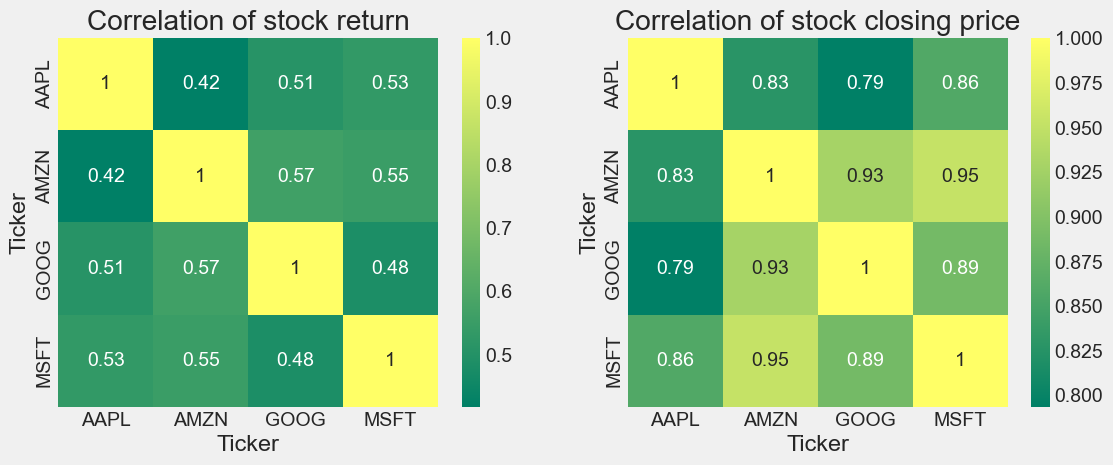

In [25]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer') # annot to true gives us the numbers in each cell
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')